In [1]:
#import mglearn as ml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import genfromtxt

dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [2]:
#entraîner le modèle de régression linéaire
lr = LinearRegression().fit(X_train, y_train)

#imprimer le score de l'ensemble d'entraînement
print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
#imprimer le score de l'ensemble de test 
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.61


In [33]:
#l'ensemble de test révèle que le modèle souffre d'overfitting
# RL fonctionne très bien sur l'ensemble d'entraînement mais mal sur l'ensemble de test, ce qui indique un potentiel de surajustement.

In [34]:
#Pour éviter l'overfitting
#contrôler la complexité du modèle, utilisons la régression de crête (régularisation L2) et voyons comment elle fonctionne sur l'ensemble de données :

### Ridge Regression 

In [5]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.90
Ridge Regression-Test set score: 0.76


In [6]:
#Bien que le score de l'ensemble d'entraînement de la régression de crête soit légèrement inférieur au score d'entraînement de régression linéaire, le score de l'ensemble de tests de ridge est significativement supérieur au score de l'ensemble de tests de régression linéaire. 
#Ces scores confirment que la régression Ridge réduit la complexité du modèle, conduisant à un modèle moins surajusté mais plus général.

In [7]:
#Le alphaparamètre spécifie un compromis entre les performances du modèle sur l'ensemble d'entraînement et sa simplicité. 
#Ainsi, augmenter la alphavaleur (sa valeur par défaut est 1,0) simplifie le modèle en réduisant les coefficients.

### Lasso Regression 

In [8]:
# la régression lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.29
Lasso Regression-Test set score: 0.21


In [9]:
#le lasso fonctionne de manière assez décevante et c'est un signe de sous-ajustement. 
#Le modèle du lasso ne fonctionne pas bien car la plupart des coefficients sont devenus exactement nuls. 

In [10]:
#connaître le nombre exact de fonctionnalités qui ont été utilisées dans le modèle
print(f"Number of features: {sum(lasso.coef_ != 0)}")

Number of features: 4


In [11]:
#Cela signifie que seules 4 des 104 fonctionnalités de l'ensemble d'apprentissage sont utilisées dans le modèle de régression lasso, tandis que les autres sont ignorées.

In [12]:
#Ajustons alphapour réduire le sous-apprentissage en diminuant sa valeur
#lasso = Lasso(alpha=0.01).fit(X_train, y_train)
lasso = Lasso(alpha=1.0, max_iter=10000).fit(X_train, y_train)
print("Lasso Regression-Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso Regression-Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Lasso Regression-Training set score: 0.29
Lasso Regression-Test set score: 0.21


In [13]:
#La réexécution du code ci-dessous montre qu'en diminuant alpha, le modèle Lasso utilise 32 des 104 fonctionnalités

In [14]:
print(f"Number of features: {sum(lasso.coef_ != 0)}")

Number of features: 4


In [15]:
#Même si l’on peut réduire alphaencore plus, il semble que sa valeur optimale soit 0.01.

### Elastic Net

In [16]:
from sklearn.linear_model import ElasticNet
#elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01, max_iter=10000).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.84
Elastic Net-Test set score: 0.70


In [27]:
#La régression linéaire fonctionne très bien sur l'ensemble d'entraînement mais mal sur l'ensemble de test, ce qui indique un potentiel de surajustement.

#La régression Ridge fonctionne bien à la fois sur l'ensemble d'entraînement et sur l'ensemble de test, ce qui indique une meilleure généralisation par rapport à la régression linéaire.

#La régression Lasso fonctionne mal à la fois sur l'ensemble d'entraînement et sur l'ensemble de test, ce qui indique qu'elle pourrait ne pas être adaptée à ce jeu de données ou nécessiter davantage de réglages.

#Le réseau élastique fonctionne raisonnablement bien à la fois sur l'ensemble d'entraînement et sur l'ensemble de test, montrant de bonnes capacités de généralisation.

In [28]:
#En général, pour éviter le surajustement, les modèles régularisés sont préférables à un modèle de régression linéaire simple. 
#Dans la plupart des scénarios, la crête fonctionne bien. 
#Mais si vous n'êtes pas sûr d'utiliser un lasso ou un filet élastique, le filet élastique est un meilleur choix car, comme nous l'avons vu, le lasso supprime les caractéristiques fortement corrélées.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.856e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.804e+00, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

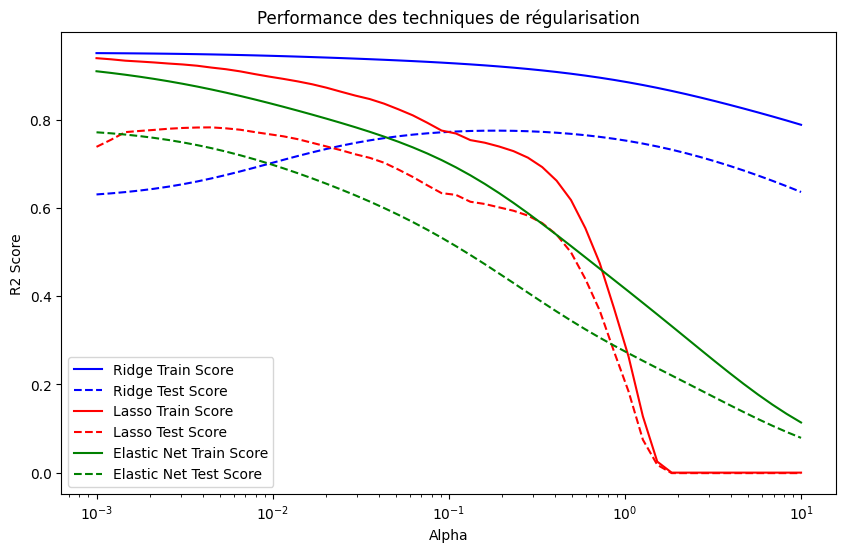

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

# Définir une plage de valeurs pour alpha
alphas = np.logspace(-3, 1, 50)

# Initialiser des listes pour stocker les scores d'entraînement et de test pour chaque méthode de régularisation
ridge_train_scores = []
ridge_test_scores = []
lasso_train_scores = []
lasso_test_scores = []
elastic_net_train_scores = []
elastic_net_test_scores = []

# Boucle sur les différentes valeurs d'alpha
for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    ridge_train_scores.append(ridge.score(X_train, y_train))
    ridge_test_scores.append(ridge.score(X_test, y_test))
    
    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train, y_train)
    lasso_train_scores.append(lasso.score(X_train, y_train))
    lasso_test_scores.append(lasso.score(X_test, y_test))
    
    # Elastic Net
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.01, max_iter=10000).fit(X_train, y_train)
    elastic_net_train_scores.append(elastic_net.score(X_train, y_train))
    elastic_net_test_scores.append(elastic_net.score(X_test, y_test))

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_train_scores, label="Ridge Train Score", color='b')
plt.plot(alphas, ridge_test_scores, label="Ridge Test Score", linestyle='--', color='b')
plt.plot(alphas, lasso_train_scores, label="Lasso Train Score", color='r')
plt.plot(alphas, lasso_test_scores, label="Lasso Test Score", linestyle='--', color='r')
plt.plot(alphas, elastic_net_train_scores, label="Elastic Net Train Score", color='g')
plt.plot(alphas, elastic_net_test_scores, label="Elastic Net Test Score", linestyle='--', color='g')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Performance des techniques de régularisation')
plt.legend()
plt.show()


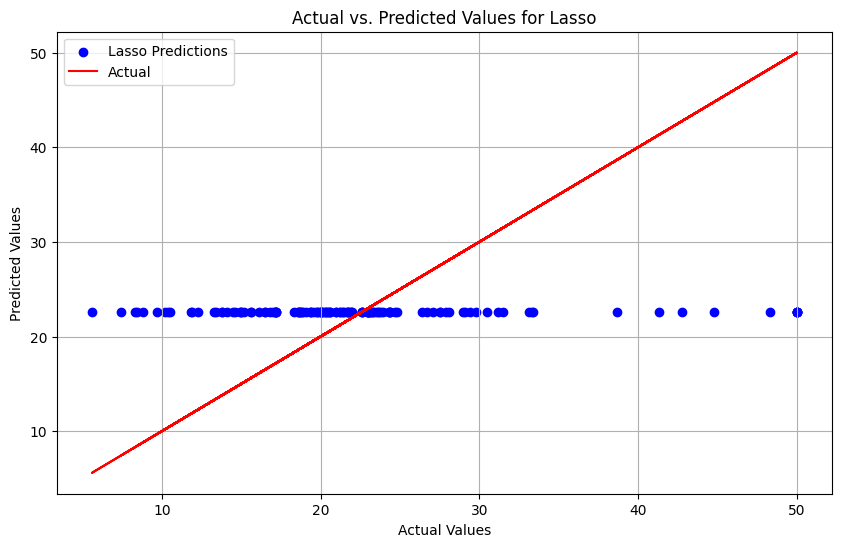

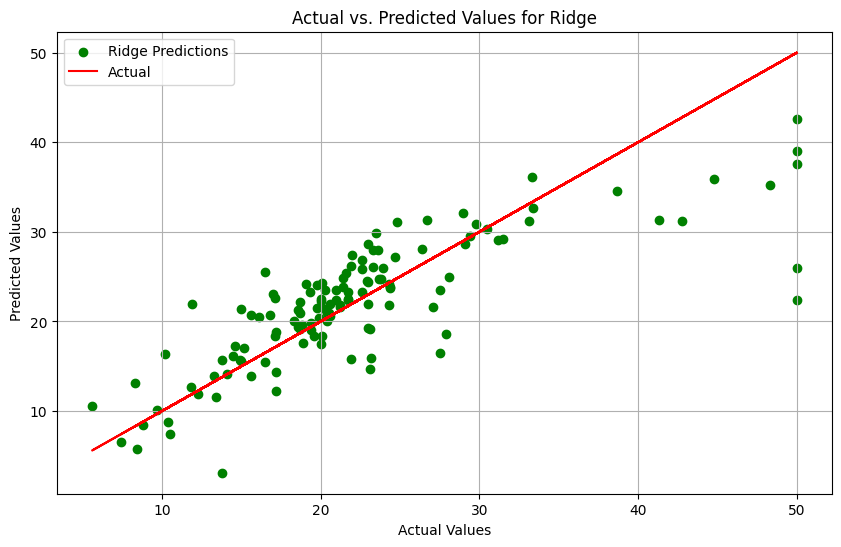

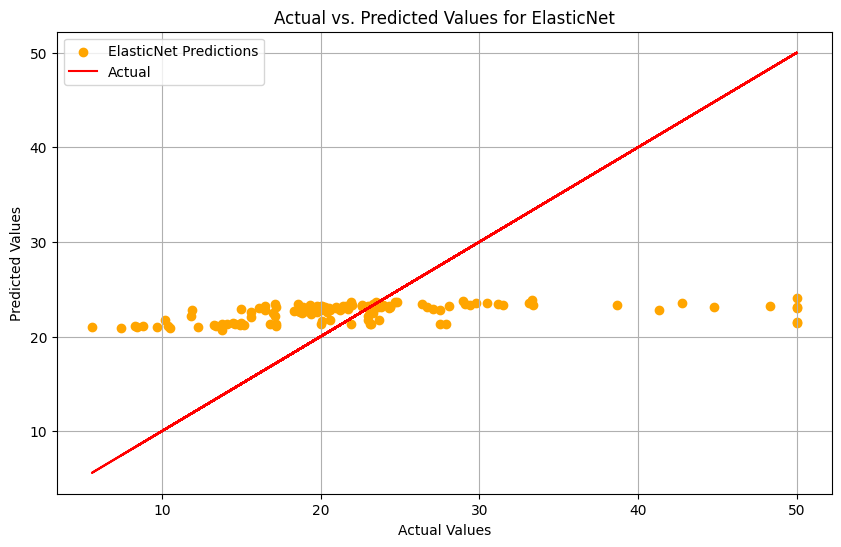

In [30]:
# Plot actual vs. predicted values for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso.predict(X_test), color='blue', label='Lasso Predictions')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Actual vs. Predicted Values for Lasso')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge.predict(X_test), color='green', label='Ridge Predictions')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Actual vs. Predicted Values for Ridge')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for ElasticNet
plt.figure(figsize=(10, 6))
plt.scatter(y_test, elastic_net.predict(X_test), color='orange', label='ElasticNet Predictions')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Actual vs. Predicted Values for ElasticNet')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

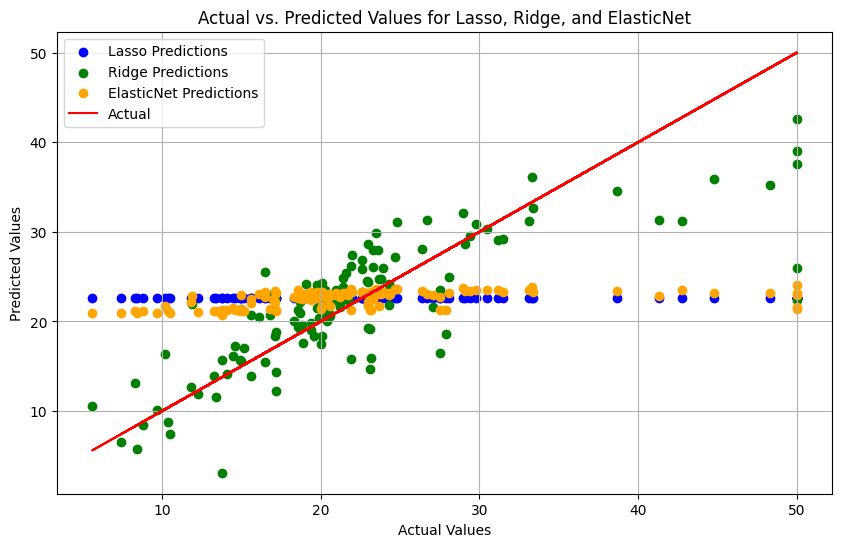

In [31]:
# Plot actual vs. predicted values for Lasso, Ridge, and ElasticNet
plt.figure(figsize=(10, 6))

# Lasso predictions
plt.scatter(y_test, lasso.predict(X_test), color='blue', label='Lasso Predictions')

# Ridge predictions
plt.scatter(y_test, ridge.predict(X_test), color='green', label='Ridge Predictions')

# ElasticNet predictions
plt.scatter(y_test, elastic_net.predict(X_test), color='orange', label='ElasticNet Predictions')

# Plotting the line y=x for reference
plt.plot(y_test, y_test, color='red', label='Actual')

# Graph settings
plt.title('Actual vs. Predicted Values for Lasso, Ridge, and ElasticNet')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()